## Polygon Environment Building
Devising scenarios for the polygon-based environments.

In [2]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats, plot_smoother_stats
from utils import latexify
from table import latex_table
from definitions import *
import matplotlib as mpl
import sys, os
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
from copy import deepcopy

### Polygon Environments

In [55]:
def visualize(scenario: str, start: {str: float}, goal: {str: float}, robot_model: str = None):
    m = MPB()
    m["max_planning_time"] = 60
    m["env.start"] = start
    m["env.goal"] = goal
    m["env.type"] = "polygon"
    m["env.polygon.source"] = "polygon_mazes/%s.svg" % scenario
    if robot_model:
        print("Using robot model %s." % robot_model)
        m["env.collision.robot_shape_source"] = robot_model
    m.set_planners(['informed_rrt_star'])
    m.set_planners(['bfmt'])
    m["steer.car_turning_radius"] = 2
#     m.set_planners(["sbpl_mha"])
    m["sbpl.scaling"] = 1
    if m.run(id="test_%s" % scenario, runs=1) == 0:
        m.visualize_trajectories(draw_start_goal_thetas=True, plot_every_nth_polygon=10, silence=True, save_file="plots/%s.pdf" % scenario)
        m.print_info()
    
# visualize("parking2",
#           {"theta": -1.57, "x": 12.3, "y": -2.73},
#           {"theta": 0, "x": 2.5, "y": -7.27})
# visualize("parking2",
#           {"theta": -1.57, "x": 12.3, "y": -2.73},
#           {"theta": 3.14, "x": 2.5, "y": -7.27})

Running MPB with ID test_parking1 (log file at test_parking1.log)...


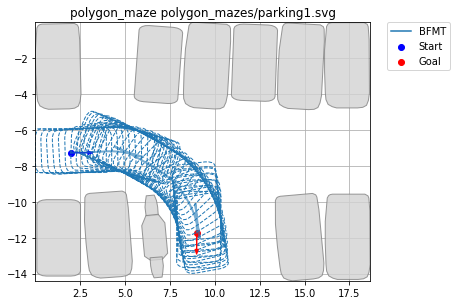

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/parking1.svg
+ Planners:        BFMT
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Running MPB with ID test_parking2 (log file at test_parking2.log)...


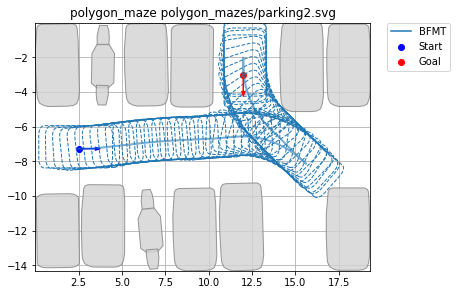

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/parking2.svg
+ Planners:        BFMT
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Running MPB with ID test_parking3 (log file at test_parking3.log)...


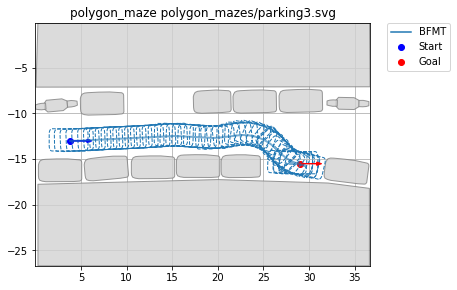

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/parking3.svg
+ Planners:        BFMT
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Using robot model polygon_mazes/warehouse_robot.svg.
Running MPB with ID test_warehouse (log file at test_warehouse.log)...


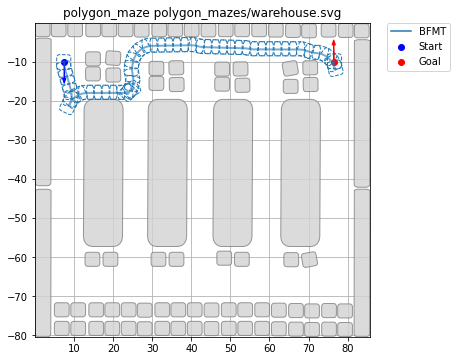

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/warehouse.svg
+ Planners:        BFMT
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Using robot model polygon_mazes/warehouse_robot.svg.
Running MPB with ID test_warehouse2 (log file at test_warehouse2.log)...


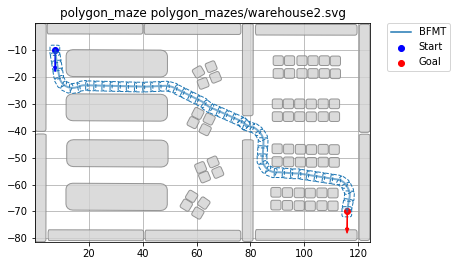

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/warehouse2.svg
+ Planners:        BFMT
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [57]:
scenarios = [
  ("parking1", {"theta": 0, "x": 2, "y": -7.27}, {"theta": -1.58, "x": 9, "y": -11.72}),
  ("parking2", {"theta": 0, "x": 2.5, "y": -7.27}, {"theta": -1.57, "x": 12, "y": -3}),
  ("parking3", {"theta": 0, "x": 3.82, "y": -13}, {"theta": 0, "x": 29, "y": -15.5}),
  ("warehouse", {"theta": -1.58, "x": 7.5, "y": -10}, {"theta": 1.58, "x": 76.5, "y": -10}, "polygon_mazes/warehouse_robot.svg"),
  ("warehouse2", {"theta": -1.58, "x": 7.5, "y": -10}, {"theta": -1.58, "x": 116, "y": -70}, "polygon_mazes/warehouse_robot.svg")
]

list(map(lambda x: visualize(*x), scenarios));

# Figurehead
Figure 1 to showcase Bench-MR.

In [6]:
m = MPB()
scenario = "warehouse"
m["max_planning_time"] = 30
m["env.start"] = {"theta": -1.58, "x": 7.5, "y": -10}
m["env.goal"] = {"theta": 1.58, "x": 76.5, "y": -10}
m["env.type"] = "polygon"
m["env.polygon.source"] = "polygon_mazes/%s.svg" % scenario
m["env.collision.robot_shape_source"] = "polygon_mazes/warehouse_robot.svg"
m.set_planners([])
m.set_planners(['bfmt', 'cforest', 'prm', 'prm_star', 'informed_rrt_star', 'sbpl_mha'])
m["steer.car_turning_radius"] = 2
m["sbpl.scaling"] = 1
m.run(id="test_%s" % scenario, runs=1)    
m.print_info()

Running MPB with ID test_warehouse (log file at test_warehouse.log)...



+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/warehouse.svg
+ Planners:        PRM, CForest, BFMT, InformedRRTstar, PRMstar, SBPL_MHA
+ Found solution:  6 / 6
+ Exact solution:  5 / 6
+ Found colliding: 1 / 6
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



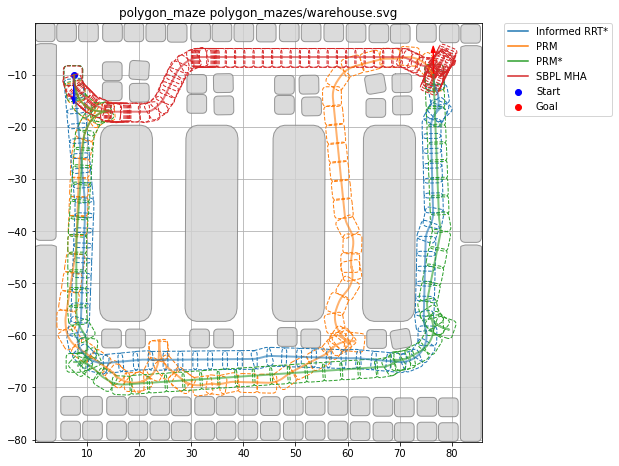

In [35]:
m.visualize_trajectories(ignore_planners='cforest, bfmt',
                         draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/%s.pdf" % scenario,
                         num_colors=10)